In [59]:
import pandas as pd
import numpy as np
from scipy import stats, interpolate
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from ipywidgets import interact

# get a list of all the colour strings in matplotlib so we can iterate through them
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colour_list = list(colors.keys())
# 9 base colours ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'aliceblue', 'antiquewhite', 'aqua'...

In [117]:
class EvaluationData:

    def __init__(self, folder_path):
        self.rand_names = ['Random10mcts', 'Random15mcts', 'Random20mcts', 'Random25mcts']
        self.rand_names1 = ['10 MCTS Simulations/Step', '15 MCTS Simulations/Step', '20 MCTS Simulations/Step', '25 MCTS Simulations/Step']
        self.rand_data = {}
        for name in self.rand_names:
            file_path = os.path.join(folder_path, name + '.csv')
            data = pd.read_csv(file_path, usecols=['score_mean', 'score_std', 'len_mean', 'len_std'])
            self.rand_data[name] = data
            
        self.adv_names = ['AdvF0', 'AdvF25', 'AdvF50', 'AdvF75', 'AdvF1', 'AdvF2']
        self.adv_names1 = ['$F_2$ = 0$F_1$', '$F_2$ = 0.025$F_1$', '$F_2$ = 0.05$F_1$', '$F_2$ = 0.075$F_1$', '$F_2$ = 0.1$F_1$', '$F_2$ = 0.2$F_1$']
        self.adv_data = {}
        for name in self.adv_names:
            file_path = os.path.join(folder_path, name + '.csv')
            data = pd.read_csv(file_path, usecols=['score_mean', 'score_std', 'len_mean', 'len_std'])
            self.adv_data[name] = data
            
        # print(self.eval_data['Random10mcts'])
        
    def plot_lengths(self, data_set='rand'):
        if data_set == 'rand':
            ds = self.rand_data
            leg = self.rand_names1
        else:
            ds = self.adv_data
            leg = self.adv_names1
        
        plt.figure(figsize=(14, 6))
        for data in ds.values():
            plt.plot(data.index, data['len_std'])
            # plt.fill_between(data.index, data['len_std']+np.sqrt(data['len_std']), data['len_mean']-np.sqrt(data['len_std']), alpha=0.5)
        plt.legend(leg)
        plt.ylabel('Episode Length'); plt.xlabel('Iteration')
        plt.xticks(np.linspace(0, 19, 20)); plt.grid()
        plt.show()
        
    def plot_scores(self, data_set='rand'):
        if data_set == 'rand':
            ds = self.rand_data
            leg = self.rand_names1
        else:
            ds = self.adv_data
            leg = self.adv_names1
        
        plt.figure(figsize=(14, 6))
        for data in ds.values():
            plt.plot(data.index, data['score_mean'])
            # plt.fill_between(data.index, data['score_mean']+np.sqrt(data['score_std']), data['score_mean']-np.sqrt(data['score_std']), alpha=0.5) 
        plt.legend(leg)
        plt.ylabel('Episode Score'); plt.xlabel('Iteration')
        plt.xticks(np.linspace(0, 19, 20)); plt.grid()
        plt.show()
        

In [118]:
# folder = os.path.join('..\Cartpole','Data', 'TrainingData\\')
# folder = os.path.join('ArchivedData', '0AdversaryXE', 'TestData\\')
folder = os.path.join('..\FinalReport','Results', 'Training1D','TestData\\')
results = EvaluationData(folder)

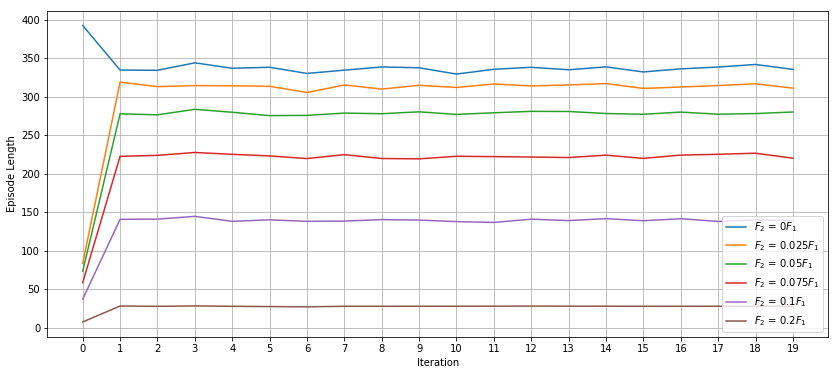

In [119]:
results.plot_lengths('adv')

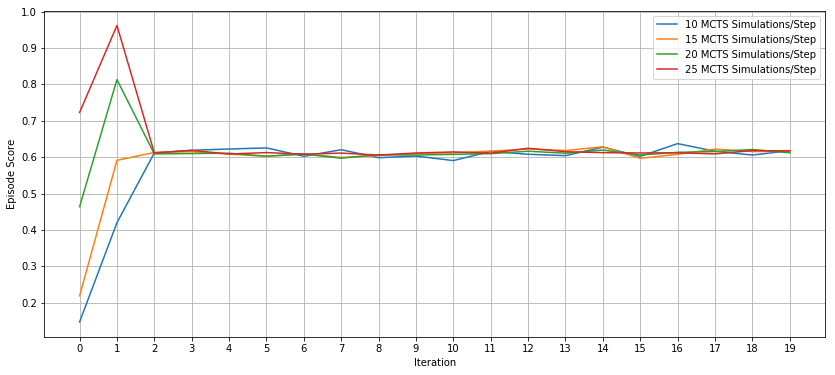

In [109]:
results.plot_scores('rand')